In [1]:
#Importint the librearys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(10,6),'figure.dpi':100})
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')


In [2]:
# mount the drive to google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# read the files from the drive
sales_df = pd.read_csv('/content/drive/MyDrive/retail sales prediction/Rossmann Stores Data (2).csv')
stores_df = pd.read_csv('/content/drive/MyDrive/retail sales prediction/store (1).csv')

In [4]:
#we have teo types of data 1-> sales data and 2-> stores datasets
# we look the sale data  first
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# look the info about the sales dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
# we find the the null values in sale_data
sales_df.isnull().sum() 

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [7]:
# there is  no null values in the sales data  od the store

In [8]:
# now we look to the satore data  
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
# describe the information about the stores data
stores_df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [10]:
# we looking the null values in stores data
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [11]:
# there are 3 null values in the CompetitionDistance
# 354 null values are in the CompetitionOpenSinceMonth and CompetitionSinceYear
#544 null values are in the Promo2sinceWeek , PromoSinceYear aand the PromoInterval 

In [12]:
# we fill the competition distance with the median value
stores_df['CompetitionDistance'].fillna(stores_df['CompetitionDistance'].median(), inplace = True)

In [13]:
# we fill  competition open since month and year with the  modes of those columns
stores_df['CompetitionOpenSinceMonth'].fillna(stores_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
stores_df['CompetitionOpenSinceYear'].fillna(stores_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)
     

In [14]:
# we fill the null values with the 0 in promo
stores_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
stores_df['Promo2SinceYear'].fillna(value=0,inplace=True)
stores_df['PromoInterval'].fillna(value=0,inplace=True)

In [15]:
#check
stores_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Text(0.5, 0, 'Competition Distance Distribution Plot')

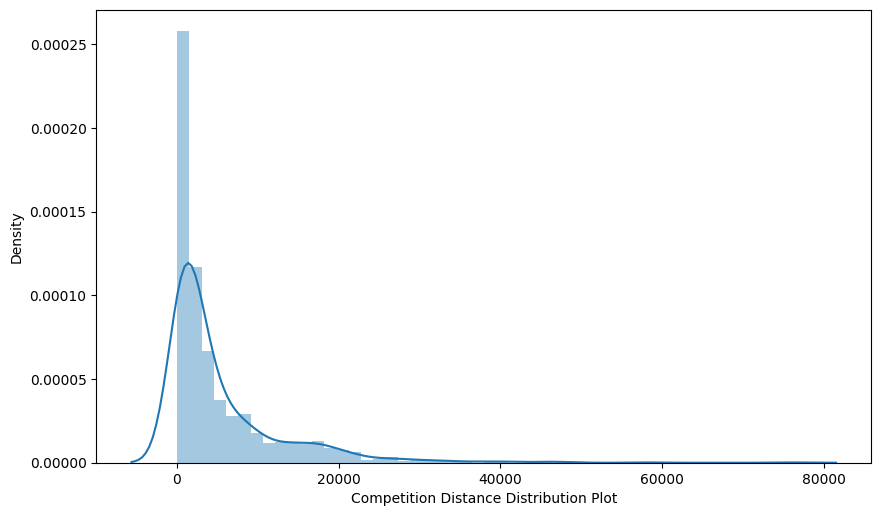

In [16]:
# we drow the distribution plot of competition distance
sns.distplot(x=stores_df['CompetitionDistance'])
plt.xlabel('Competition Distance Distribution Plot')

In [17]:
# in this plot we show that the Copetition  Distance distribution is skewed on the right. Median is more robust to outlier effect.

In [18]:
# we merge the seals data on stores data
df = sales_df.merge(right=stores_df )

In [19]:
#see the merged dataset
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [20]:

#describe the informattion of merge data set
df.info()
     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [21]:
# in this 13 values are the categorical values we make the other categorical column

In [22]:
# we creating a categorical column list of the data 
categorical_columns = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']
     

# now we find the unique values in categorical_columns
for i in categorical_columns:
  print(f'Unique values for {i}: {df[i].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']




## EXPLORETERY DATA ANALYSIS (EDA)







In [23]:
# Now we change the data into integerse
df['StateHoliday'].replace({'0':0}, inplace=True)
df['StoreType'].replace({'a':1 ,'b':1 ,'c':1 ,'d':1},inplace = True)
df['Assortment'].replace({'a':1 ,'b':1 ,'c':1 ,'d':1},inplace = True)
df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [24]:
# convert tha date into Datetimeobject
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
#  noe we have to seperate the date into year month and the days 
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.weekofyear
df['DayOfYear'] = df['Date'].dt.dayofyear
years = df['Year'].unique()

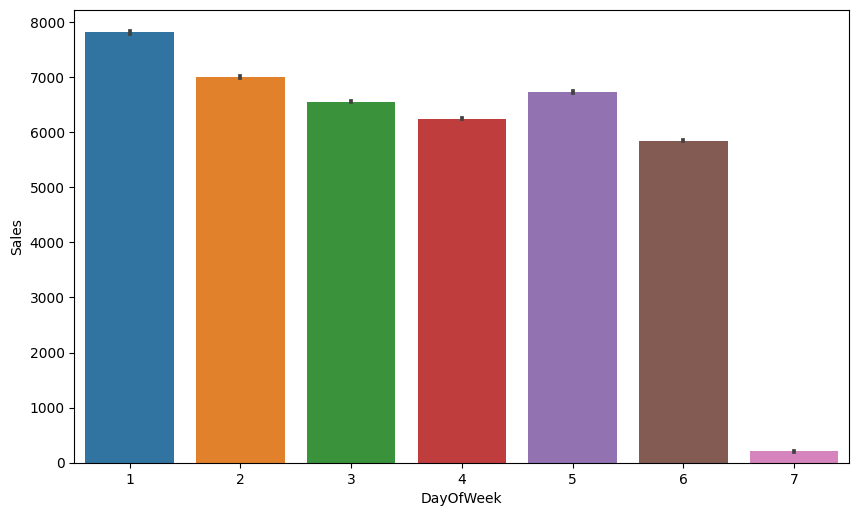

In [26]:
# noe we plote the bar plote for day of week and the sales
sns.barplot(x=df['DayOfWeek'], y=df['Sales']) 

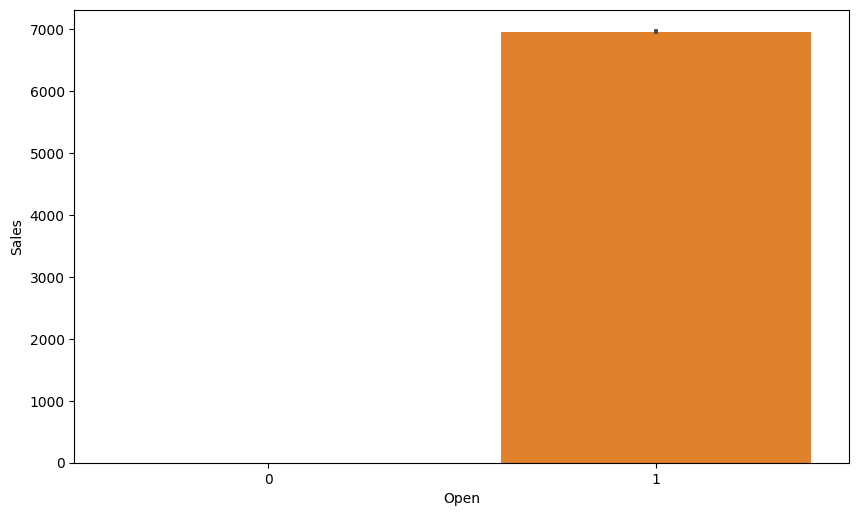

In [27]:
# noe we plote the bar plote for open and the sales
sns.barplot(x=df['Open'], y=df['Sales']) 

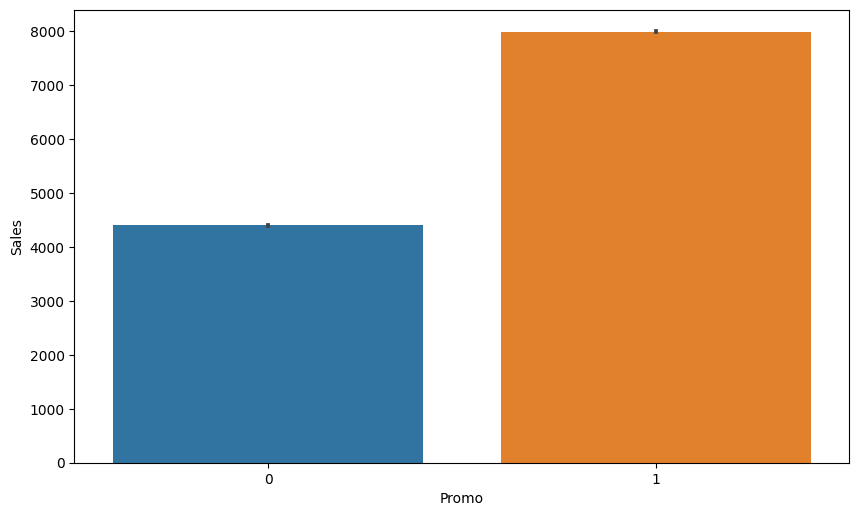

In [28]:
## noe we plote the bar plote for Promo and the sales
sns.barplot(x=df['Promo'], y=df['Sales']) 

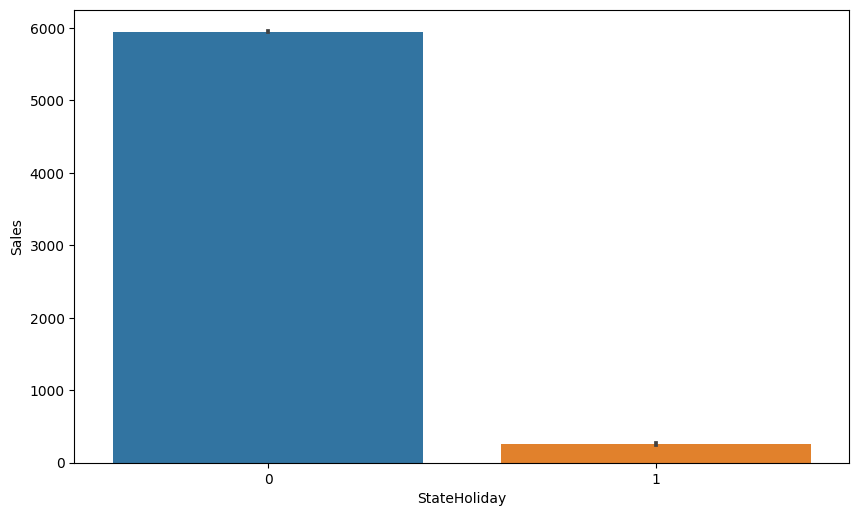

In [29]:
# noe we plote the bar plote for day of State holiday sales
sns.barplot(x=df['StateHoliday'], y=df['Sales']) 

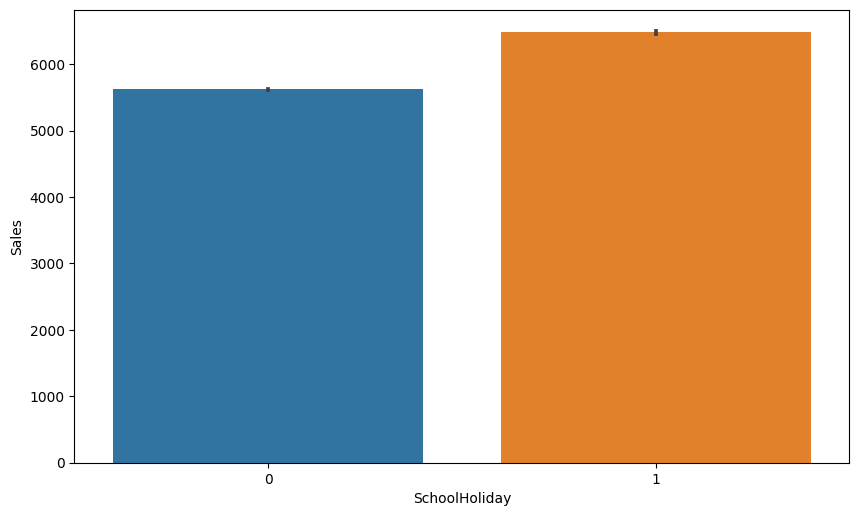

In [30]:
# noe we plote the bar plote for school holiday and the sales
sns.barplot(x=df['SchoolHoliday'], y=df['Sales']) 

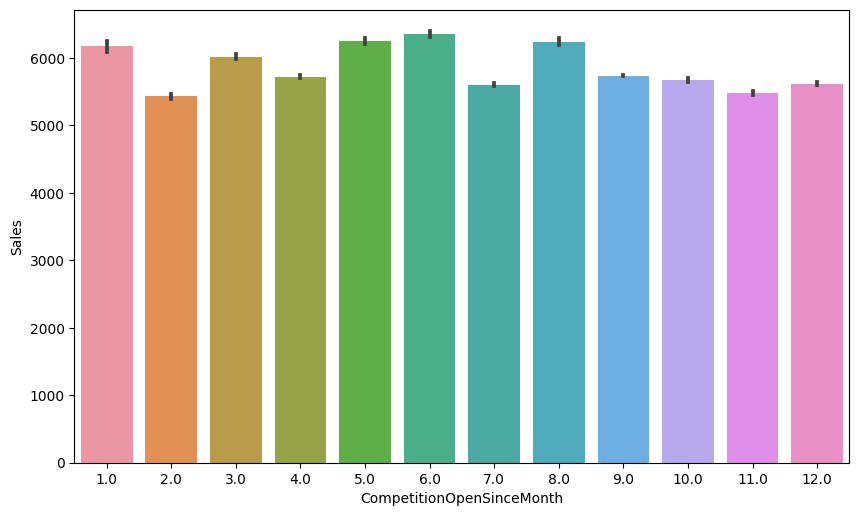

In [31]:
# noe we plote the bar plote for Competition open since month and the sales
sns.barplot(x=df['CompetitionOpenSinceMonth'], y=df['Sales']) 

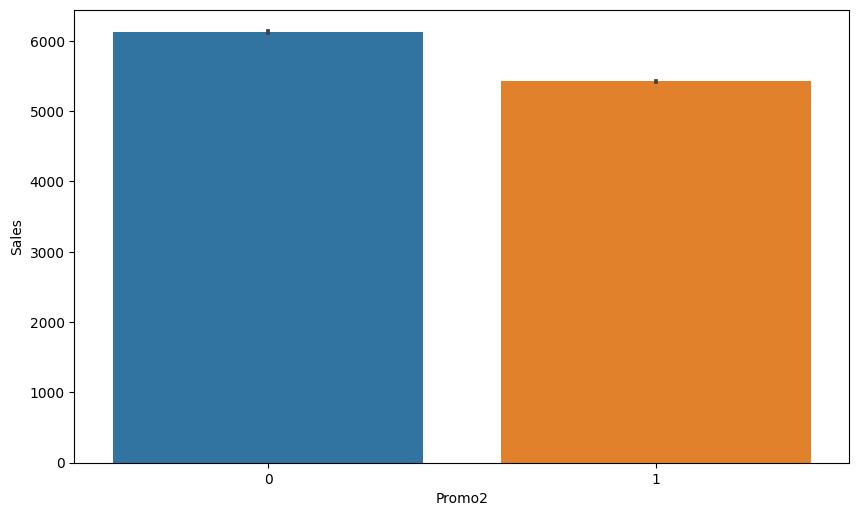

In [32]:
# noe we plote the bar plote for Promo2 and the sales
sns.barplot(x=df['Promo2'], y=df['Sales']) 

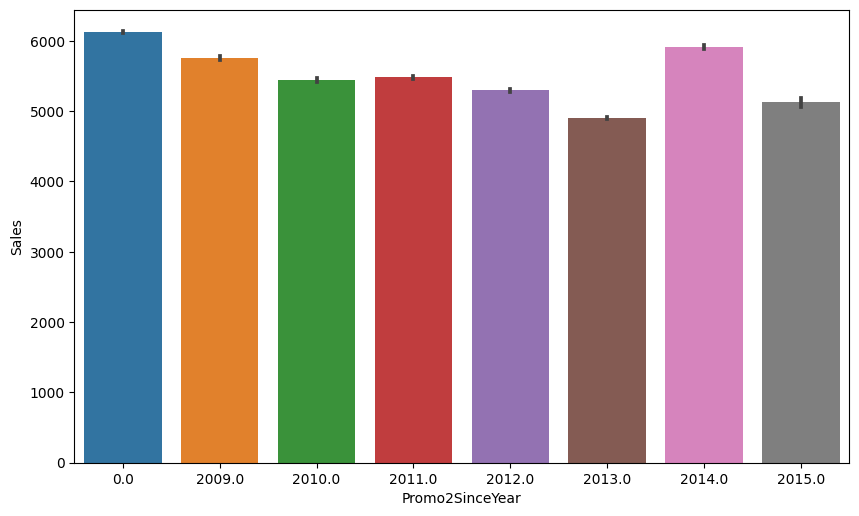

In [33]:
# noe we plote the bar plote for promo2 since year and the sales
sns.barplot(x=df['Promo2SinceYear'], y=df['Sales']) 

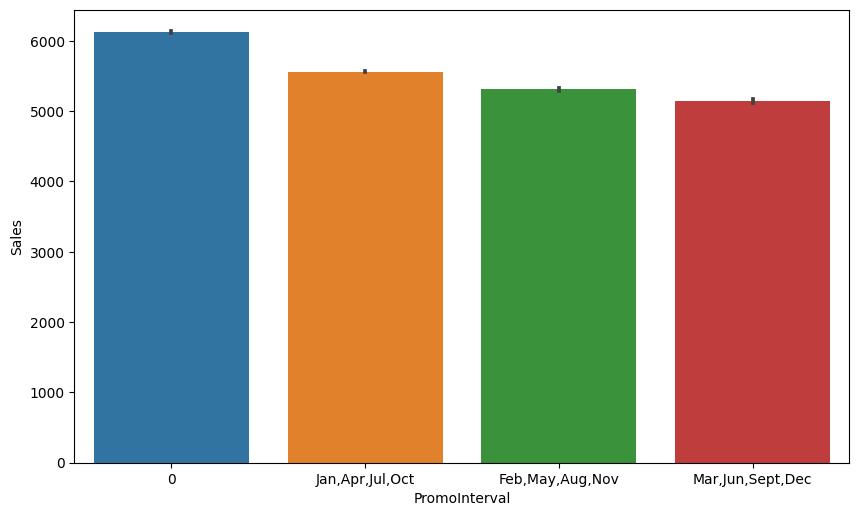

In [34]:
# noe we plote the bar plote for Promo interval and the sales
sns.barplot(x=df['PromoInterval'], y=df['Sales']) 

In [35]:
# in 7th days of the week the sale in likely minimum because of most of the stores sare close to sunday 
# the sale in 1st day of the week in sale is likely maximum sales of the weeek because the store are closed on sunday
# sale and open have the direct relationship betwwen the open and the sale
# promo is leads the sale and make the sale approximetly dubble 
# on state holiday sales becom approximetly 0 but during the school holiday the sales remaince the same 
# B type store have more sa;es then other and Assortment B have the more sales 
# In every month  sale is alwase more then 5000


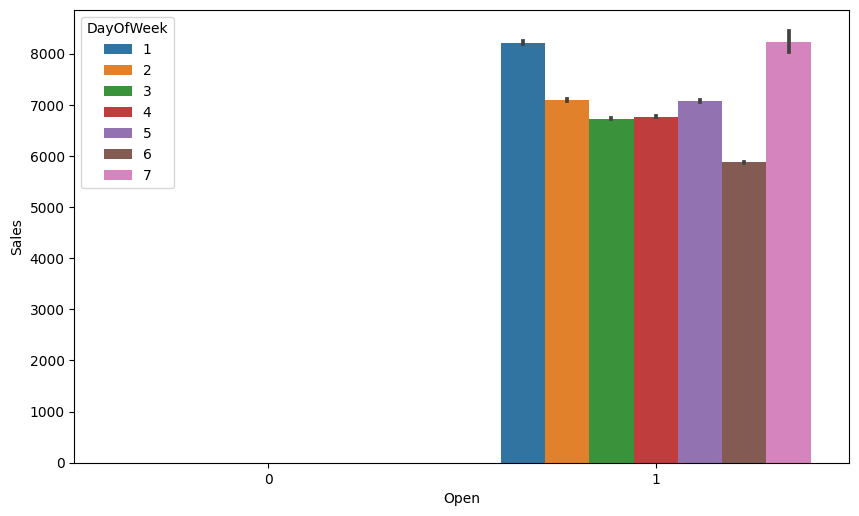

In [36]:
# we finding the relationship between  open and storetype  
sns.barplot(x=df["Open"],y=df['Sales'],hue=df["DayOfWeek"])

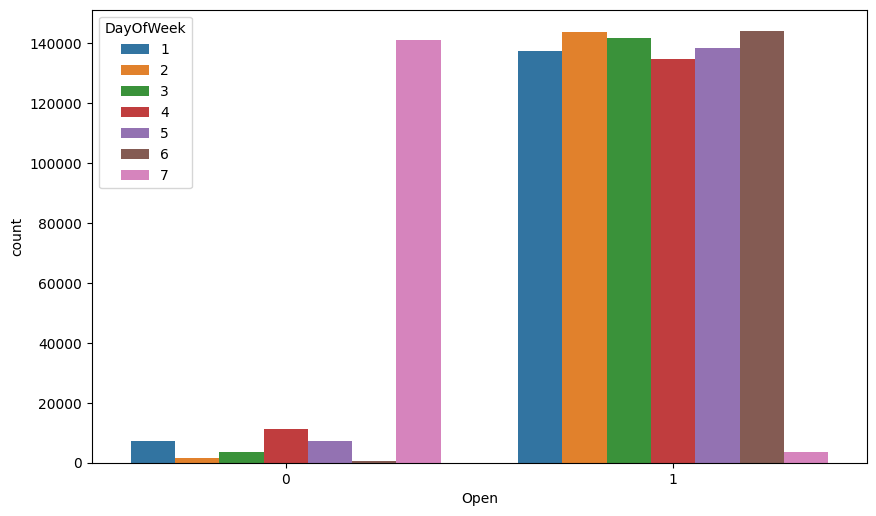

In [37]:

# plot the opening day of the shops
#and this gives a counts of stores closed for refurbishment and suggests that most stores are closed on sunday
sns.countplot(x=df["Open"], hue=df["DayOfWeek"])
     

In [38]:
# in this barplote we show that whether store was open or closed for refurbishment and weekends or holidays

In [39]:
# now we calculate the sales of the years and the sales of the month
# sales of the year
sales_df_2013 = df[df['Year']== 2013]
sales_df_2014 = df[df['Year']==2014]
sales_df_2015 = df[df['Year']== 2015]
     

# sales of the month
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()

In [40]:
#now we ploting the line plote of the total  sale

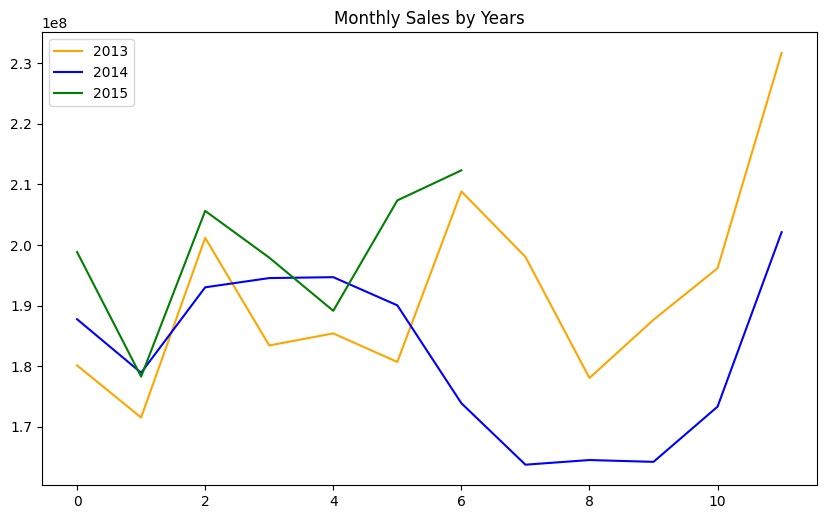

In [41]:
plt.title('Monthly Sales by Years')
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.legend()

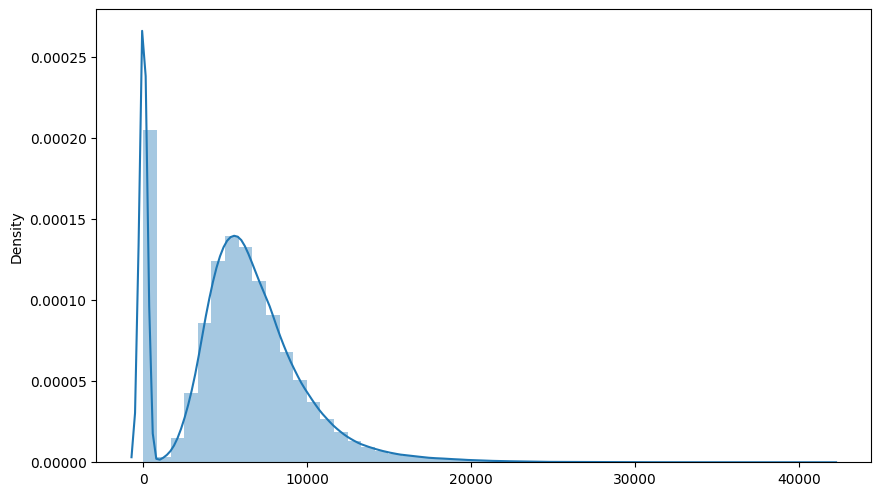

In [42]:
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=df['Sales'])
     

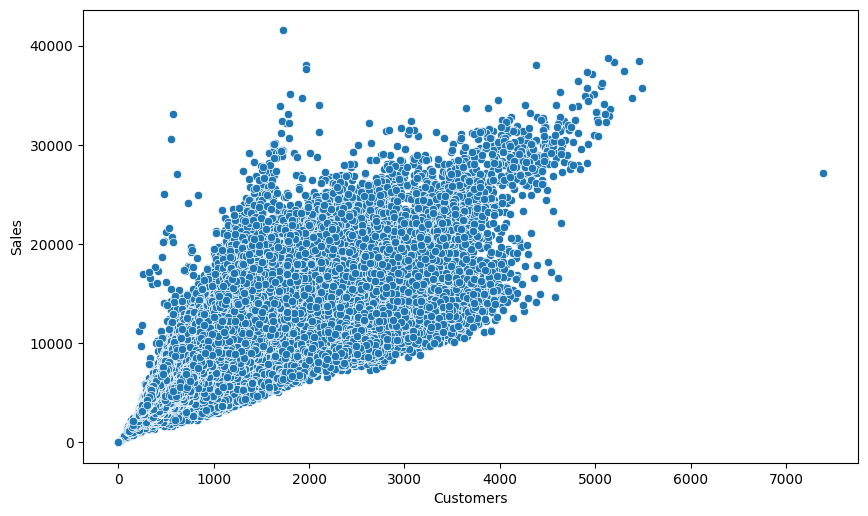

In [43]:
# plot the scatterplot of Customers and Sales to finde the relationship between the customer and thr sales
sns.scatterplot(x=df['Customers'], y=df['Sales'])

In [44]:
# customer and the Sales have the linear correlation

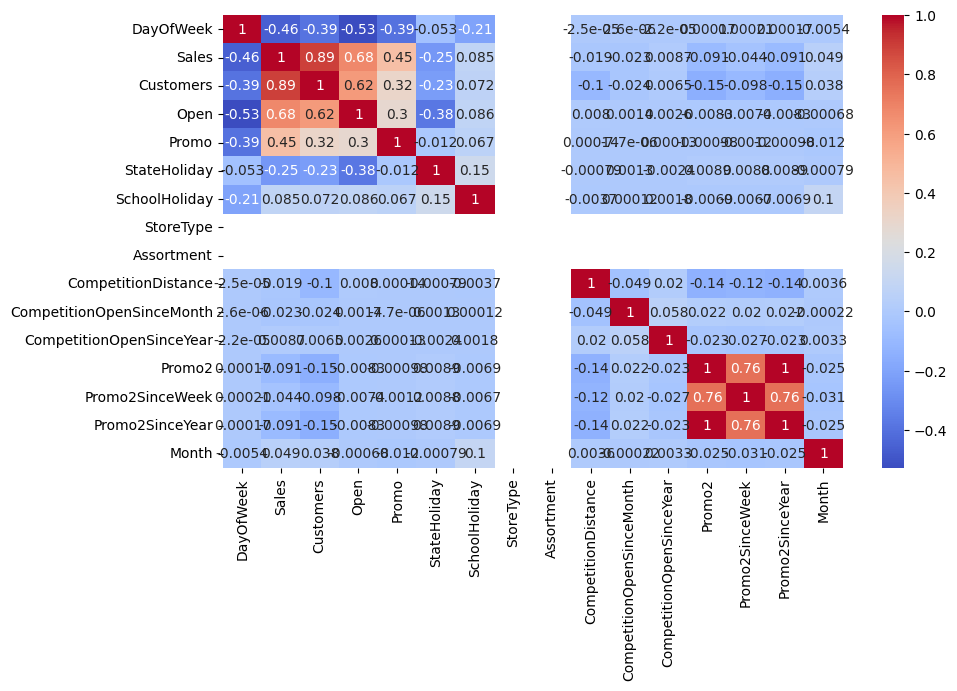

In [45]:
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store', 'Year', 'WeekOfYear', 'DayOfYear']
corr_df = df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)
     

# heatmap of the correlation 
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)

## Feature engenering

In [46]:
# find the no of observations for closed stores with 0 sales
(df[df.Open == 0]).shape

(172817, 22)

In [47]:
#remove the stores closed had 0 sale value
df1 = df[df.Open != 0]
df1.drop('Open', axis=1, inplace=True)
     

In [48]:
#setting date and store as index
df1.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
df1.sort_index(inplace=True)

total no of otlierin Sales column are 13437.


[Text(0.5, 1.0, 'Outliers Distribution')]

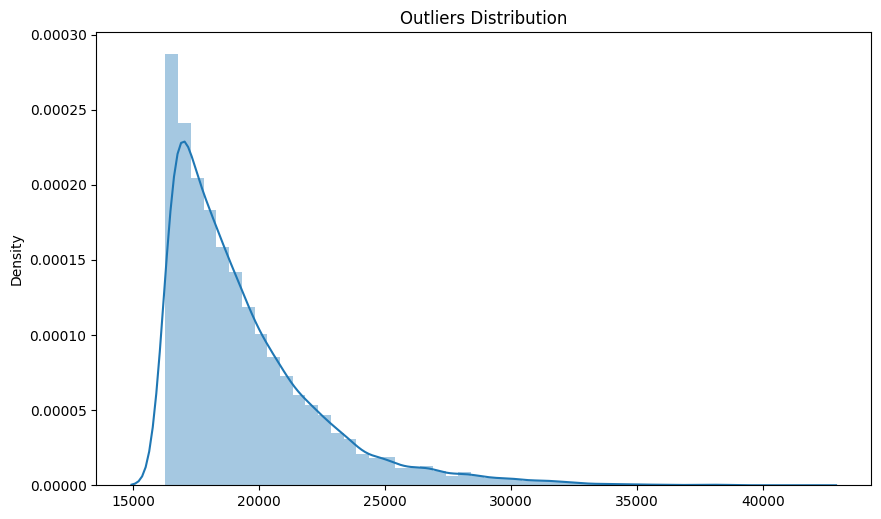

In [49]:
#now we seperate the outliers
mean_sales = np.mean(df1['Sales']) 
sd_sales = np.std(df1['Sales'])   
#More than 3 standard deviation is an outlier
sd = 3

#code for identify them
outliers = []
for value in df1['Sales']:
    score = (value-mean_sales)/sd_sales
    if score > sd:
        outliers.append(value)

print(f'total no of otlierin Sales column are {len(outliers)}.')
#plotting the outlier distribution
sns.distplot(x=outliers).set(title='Outliers Distribution')
 

In [50]:
#percentage of sales greater than 10.2
sales_outliers = df1.loc[df1['Sales']> 10.2]
percentage_of_outliers = (len(sales_outliers)/len(df1))*100
#print
print(f'The percentage of observations of sales greater than 28000 are {percentage_of_outliers}')
     

#exploring the reasons behind this behaviour
sales_outliers
 

The percentage of observations of sales greater than 28000 are 99.99360486598641


DayOfWeek  Sales  Customers  Promo  StateHoliday  \
Date       Store                                                     
2013-01-01 85             2   4220        619      0             1   
           259            2   6851       1444      0             1   
           262            2  17267       2875      0             1   
           274            2   3102        729      0             1   
           335            2   2401        482      0             1   
...                     ...    ...        ...    ...           ...   
2015-07-31 1111           5   5723        422      1             0   
           1112           5   9626        767      1             0   
           1113           5   7289        720      1             0   
           1114           5  27508       3745      1             0   
           1115           5   8680        538      1             0   

                  SchoolHoliday  StoreType  Assortment  CompetitionDistance  \
Date       Store                                                              
2013-01-01 85                 1          1           1               1870.0   
           259                1          1           1                210.0   
           262                1          1           1               1180.0   
           274                1          1           1               3640.0   
           335                1          1           1                 90.0   
...                         ...        ...         ...                  ...   
2015-07-31 1111               1          1           1               1900.0   
           1112               1          1           1               1880.0   
           1113               1          1           1               9260.0   
           1114               1          1           1                870.0   
           1115               1          1           1               5350.0   

                  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
Date       Store                                                                
2013-01-01 85                          10.0                    2011.0       0   
           259                          9.0                    2013.0       0   
           262                          5.0                    2013.0       0   
           274                          9.0                    2013.0       1   
           335                          9.0                    2013.0       1   
...                                     ...                       ...     ...   
2015-07-31 1111                         6.0                    2014.0       1   
           1112                         4.0                    2006.0       0   
           1113                         9.0                    2013.0       0   
           1114                         9.0                    2013.0       0   
           1115                         9.0                    2013.0       1   

                  Promo2SinceWeek  Promo2SinceYear     PromoInterval  Year  \
Date       Store                                                             
2013-01-01 85                 0.0              0.0                 0  2013   
           259                0.0              0.0                 0  2013   
           262                0.0              0.0                 0  2013   
           274               10.0           2013.0   Jan,Apr,Jul,Oct  2013   
           335               31.0           2013.0   Jan,Apr,Jul,Oct  2013   
...                           ...              ...               ...   ...   
2015-07-31 1111              31.0           2013.0   Jan,Apr,Jul,Oct  2015   
           1112               0.0              0.0                 0  2015   
           1113               0.0              0.0                 0  2015   
           1114               0.0              0.0                 0  2015   
           1115              22.0           2012.0  Mar,Jun,Sept,Dec  2015   

          

In [51]:
#lets see which stores were open on Sunday in the outliers dataframe
sales_outliers.loc[sales_outliers['DayOfWeek']==7]

DayOfWeek  Sales  Customers  Promo  StateHoliday  \
Date       Store                                                     
2013-01-06 85             7  10509       1509      0             0   
           259            7   7926       1686      0             0   
           262            7  23240       3479      0             0   
           274            7   3802        932      0             0   
           310            7   2334        193      0             0   
...                     ...    ...        ...    ...           ...   
2015-07-26 948            7  12040       2346      0             0   
           1045           7   5968        832      0             0   
           1081           7   5766        875      0             0   
           1097           7  13307       2710      0             0   
           1099           7   5683        962      0             0   

                  SchoolHoliday  StoreType  Assortment  CompetitionDistance  \
Date       Store                                                              
2013-01-06 85                 0          1           1               1870.0   
           259                1          1           1                210.0   
           262                0          1           1               1180.0   
           274                1          1           1               3640.0   
           310                0          1           1               2290.0   
...                         ...        ...         ...                  ...   
2015-07-26 948                0          1           1               1430.0   
           1045               0          1           1              26990.0   
           1081               0          1           1                400.0   
           1097               0          1           1                720.0   
           1099               0          1           1                200.0   

                  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
Date       Store                                                                
2013-01-06 85                          10.0                    2011.0       0   
           259                          9.0                    2013.0       0   
           262                          5.0                    2013.0       0   
           274                          9.0                    2013.0       1   
           310                          9.0                    2013.0       1   
...                                     ...                       ...     ...   
2015-07-26 948                          9.0                    2013.0       0   
           1045                        12.0                    2013.0       0   
           1081                         3.0                    2006.0       0   
           1097                         3.0                    2002.0       0   
           1099                         4.0                    2013.0       1   

                  Promo2SinceWeek  Promo2SinceYear     PromoInterval  Year  \
Date       Store                                                             
2013-01-06 85                 0.0              0.0                 0  2013   
           259                0.0              0.0                 0  2013   
           262                0.0              0.0                 0  2013   
           274               10.0           2013.0   Jan,Apr,Jul,Oct  2013   
           310               10.0           2014.0  Mar,Jun,Sept,Dec  2013   
...                           ...              ...               ...   ...   
2015-07-26 948                0.0              0.0                 0  2015   
           1045               0.0              0.0                 0  2015   
           1081               0.0              0.0                 0  2015   
           1097               0.0              0.0                 0  2015   
           1099              14.0           2013.0   Jan,Apr,Jul,Oct  2015   

          

In [52]:
df1.drop(df1[df1['Sales'] == float("-inf")].index,inplace=True)

In [53]:
     
# we create the copy of the data for something messes up
df2 = df1.copy()
     

In [54]:
#start date
df2.head(1)

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
Date,Store,,,,,,,,,,,,,,,,,,,
2013-01-01,85,2,4220,619,0,1,1,1,1,1870.0,10.0,2011.0,0,0.0,0.0,0,2013,1,1,1


In [55]:
# we won't need customers for sales forecasting
df2.drop('Customers',axis=1,inplace=True)

In [56]:
df2.drop(['PromoInterval'],axis=1,inplace=True)

## Train and Test split

In [57]:
#split the data in train and test and X and Y
X = df2.drop('Sales',axis =1)
Y = df2['Sales']

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=45)

In [59]:
X_train

,,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,WeekOfYear,DayOfYear
Date,Store,,,,,,,,,,,,,,,,
2013-06-14,361,5,0,0,0,1,1,4490.0,5.0,2014.0,1,5.0,2013.0,2013,6,24,165
2013-08-14,17,3,1,0,1,1,1,50.0,12.0,2005.0,1,26.0,2010.0,2013,8,33,226
2014-03-19,396,3,1,0,0,1,1,23130.0,9.0,2013.0,0,0.0,0.0,2014,3,12,78
2013-12-02,239,1,1,0,0,1,1,610.0,9.0,2013.0,0,0.0,0.0,2013,12,49,336
2015-06-19,1008,5,1,0,0,1,1,30.0,9.0,2010.0,0,0.0,0.0,2015,6,25,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-20,1089,4,1,0,0,1,1,5220.0,5.0,2009.0,0,0.0,0.0,2014,2,8,51
2014-09-25,873,4,0,0,0,1,1,2040.0,11.0,2008.0,0,0.0,0.0,2014,9,39,268
2014-11-06,1072,4,1,0,0,1,1,5380.0,8.0,2015.0,1,5.0,2010.0,2014,11,45,310


In [60]:
X_train.shape ,X_test.shape

((675513, 16), (168879, 16))

In [61]:
Y_train.shape , Y_test.shape

((675513,), (168879,))

In [62]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit_transform(X_train)
std.fit_transform(X_test)

array([[ 0.86175104, -0.89917384, -0.03293617, ...,  0.3475816 ,
         0.44153691,  0.42062815],
       [ 0.86175104, -0.89917384, -0.03293617, ..., -1.45668884,
        -1.36406553, -1.37367878],
       [-0.88000965, -0.89917384, -0.03293617, ..., -1.45668884,
        -1.43351178, -1.46240825],
       ...,
       [-0.88000965, -0.89917384, -0.03293617, ...,  0.64829334,
         0.7193219 ,  0.68681654],
       [ 0.28116414,  1.11213199, -0.03293617, ..., -0.55455362,
        -0.60015681, -0.6046901 ],
       [-1.46059655,  1.11213199, -0.03293617, ...,  1.55042855,
         1.55267687,  1.49524054]])

## we use Decission Tree 

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [64]:
dtc = DecisionTreeRegressor()
dtc.fit(X_train,Y_train)

DecisionTreeRegressor()

In [65]:
X_pred = dtc.predict(X_test)
Y_pred = dtc.predict(X_test)
Y_pred

array([ 4864.,  4811.,  9697., ...,  2306.,  6330., 13015.])

In [66]:
MAE = round(mean_absolute_error(Y_test,Y_pred),3)
MSE = round(mean_squared_error(Y_test,Y_pred),3)
r2 = r2_score((Y_test),(Y_pred))
print("MAE :" , MAE)
print("MSE :" , MSE)
print("r2:",r2)

MAE : 865.989
MSE : 2074744.712
r2: 0.7870465309569643


In [67]:
#Columns needed to compare metrics
##comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']
     

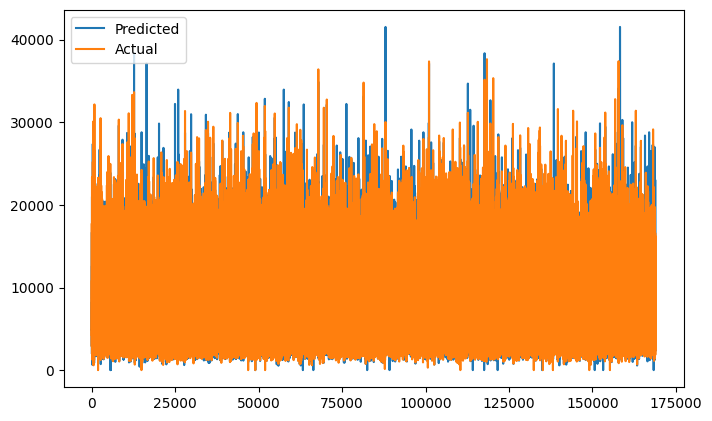

In [68]:
plt.figure(figsize=(8,5))
plt.plot(Y_pred)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.show()


## Random Forest

In [69]:
# now we use the  another algoritham called Random forestt

In [70]:
from sklearn.ensemble import RandomForestRegressor


In [71]:
# fitting 
random_forest = RandomForestRegressor(n_estimators=100,random_state=42)
random_forest.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [72]:
X_pred = random_forest.predict(X_test)
Y_pred = random_forest.predict(X_test)
Y_pred

array([ 5461.43      ,  4810.92033333,  9352.28      , ...,
        2801.4       ,  6373.55      , 11863.15      ])

In [73]:
mae = round(mean_absolute_error(Y_test,Y_pred),3)
mse = round(mean_squared_error(Y_test,Y_pred),3)
R2 = r2_score((Y_test),(Y_pred))
print("mae :" , mae)
print("mse :" , mse)
print("R2:",R2)

mae : 674.975
mse : 1224374.55
R2: 0.8743292096706201


In [74]:
# compair the algoritham's predicted result for ffinding the best algoritham 
# and we finde that the random forest is better then the decission tree 

## Cross Validation

In [75]:
# now we do the cross velidation of random forest 

In [76]:
#import
from sklearn.model_selection import RandomizedSearchCV

In [77]:
random_forest_grid = {'bootstrap': [True, False],'max_depth': [ 80,90,100, None], 'min_samples_leaf': [1, 2, 4],
                      'min_samples_split': [2,4,6],'n_estimators': [100, 125, 150]}


In [78]:
rf_tuned = RandomForestRegressor()


In [79]:
random_forest_cv = RandomizedSearchCV(estimator = rf_tuned, param_distributions = random_forest_grid, n_iter = 10, cv = 3, verbose=2, random_state=42)


In [80]:
#fitting
random_forest_cv.fit(X_train,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time= 5.9min
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time= 5.9min
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time= 6.0min
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time= 5.4min
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time= 5.4min
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time= 5.4min
[CV] END bootstrap=False, max_depth=90, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time= 6.0min
[CV] END bootstrap=False, max_depth=90, min_samples_leaf=1, min_samples_split=4, n_estimators=100; to

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [80, 90, 100, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 125, 150]},
                   random_state=42, verbose=2)

In [82]:
#best para
random_forest_cv.best_params_


{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_depth': 80,
 'bootstrap': True}

In [83]:
new_random_forest = random_forest_cv.best_params_


In [ ]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']
 

In [91]:
# fitting 
random_forest = RandomForestRegressor(n_estimators=100,random_state=42)
random_forest.fit(X_train,Y_train)

TypeError: ignored

In [92]:
mae = round(mean_absolute_error(Y_test,Y_pred),3)
mse = round(mean_squared_error(Y_test,Y_pred),3)
R2 = r2_score((Y_test),(Y_pred))

In [93]:
print(mae)
print(mse)
print(R2)

674.975
1224374.55
0.8743292096706201


In [90]:
y_pred_test

NameError: ignored